# United Nations World Populations Prospects 2022

### Setup

Import necessary libraries 

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import os
import glob

import geopandas as gpd
import missingno as msno
import re

plt.rcParams['axes.edgecolor']='#FA6E4F'
plt.rcParams['font.family'] = 'monospace'

### Link data from CSV file via pandas

Remember to specify the encoding format, i.e. "ISO-8859-1" or "utf-8".

In [38]:
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2022_Demographic_Indicators_Medium.zip
file = pd.read_csv('/kaggle/input/un-world-population-prospects/WPP2022_Demographic_Indicators_Medium.csv', encoding = "ISO-8859-1", low_memory=False)

### Custom color palettes

Predesigned color palettes for data visualisation

In [39]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

research_palette = ['#FA6E4F','#8EC9BB']
custom_palette4 = sns.color_palette(research_palette)

shortest_palette = ['#003f5c','#ff6361']
custom_palette5 = sns.color_palette(shortest_palette)

international_palette = ['#ffcf6a','#628d82']
custom_palette6 = sns.color_palette(international_palette)

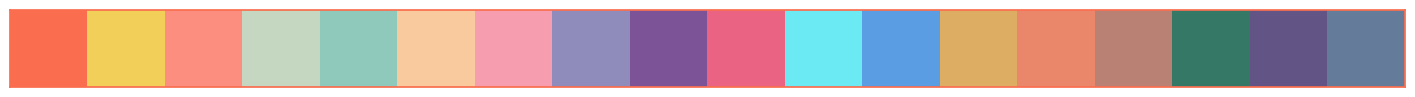

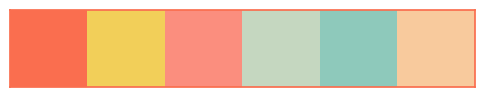

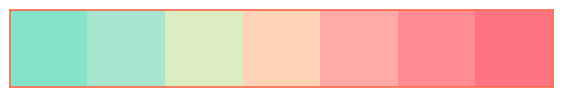

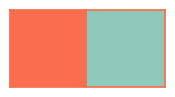

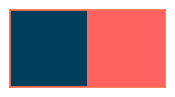

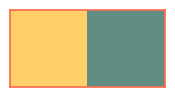

In [40]:

sns.palplot(custom_palette1)
sns.palplot(custom_palette2)
sns.palplot(custom_palette3)
sns.palplot(custom_palette4)
sns.palplot(custom_palette5)
sns.palplot(custom_palette6)

In [41]:
file.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [42]:
file.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [43]:
file.describe()

,SortOrder,LocID,SDMX_code,LocTypeID,ParentID,VarID,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
count,43472.000000,43472.000000,42864.000000,43472.000000,43472.000000,43472.0,43472.000000,4.347200e+04,4.318600e+04,4.318600e+04,...,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000,43186.000000
mean,147.332168,597.363636,410.088652,4.311189,1217.958042,2.0,2025.500000,2.437960e+05,2.440243e+05,1.221311e+05,...,230.672052,167.528194,88.623107,104.664994,72.058302,160.871913,191.272787,129.502431,-26.787488,-0.023250
std,82.836780,565.624103,268.838375,1.898958,1004.616135,0.0,43.878176,9.533881e+05,9.536740e+05,4.779175e+05,...,173.372260,159.337831,84.139463,91.902748,77.690070,121.131403,131.796086,112.327630,421.691260,10.670331
min,1.000000,4.000000,1.000000,1.000000,0.000000,2.0,1950.000000,5.080000e-01,5.100000e-01,2.460000e-01,...,7.665600,3.686800,2.164700,2.904400,1.328700,5.556600,7.446900,3.576300,-8636.202000,-526.323000
25%,76.000000,266.000000,158.000000,4.000000,914.000000,2.0,1987.750000,6.073463e+02,6.103307e+02,3.064090e+02,...,88.241775,49.415325,27.297075,35.225125,18.750625,63.509825,81.957125,44.202025,-12.499000,-1.381000
50%,147.500000,529.500000,415.500000,4.000000,922.000000,2.0,2025.500000,7.227150e+03,7.243970e+03,3.576372e+03,...,192.366800,109.848150,61.788700,79.642850,42.674800,133.883450,170.604950,94.268300,-0.500000,-0.168000
75%,219.000000,792.000000,643.000000,4.000000,931.000000,2.0,2063.250000,4.826893e+04,4.834286e+04,2.392126e+04,...,325.327575,230.770550,119.285875,144.534800,93.922775,223.979800,268.038025,178.899825,1.995000,1.074750
max,290.000000,5501.000000,914.000000,13.000000,5501.000000,2.0,2101.000000,1.043105e+07,1.043093e+07,5.192851e+06,...,999.971300,998.752100,996.165900,999.101700,985.125500,999.602500,999.941800,997.597100,7674.484000,415.239000


In [44]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43472 entries, 0 to 43471
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SortOrder               43472 non-null  int64  
 1   LocID                   43472 non-null  int64  
 2   Notes                   11552 non-null  object 
 3   ISO3_code               36024 non-null  object 
 4   ISO2_code               35872 non-null  object 
 5   SDMX_code               42864 non-null  float64
 6   LocTypeID               43472 non-null  int64  
 7   LocTypeName             43472 non-null  object 
 8   ParentID                43472 non-null  int64  
 9   Location                43472 non-null  object 
 10  VarID                   43472 non-null  int64  
 11  Variant                 43472 non-null  object 
 12  Time                    43472 non-null  int64  
 13  TPopulation1Jan         43472 non-null  float64
 14  TPopulation1July        43186 non-null

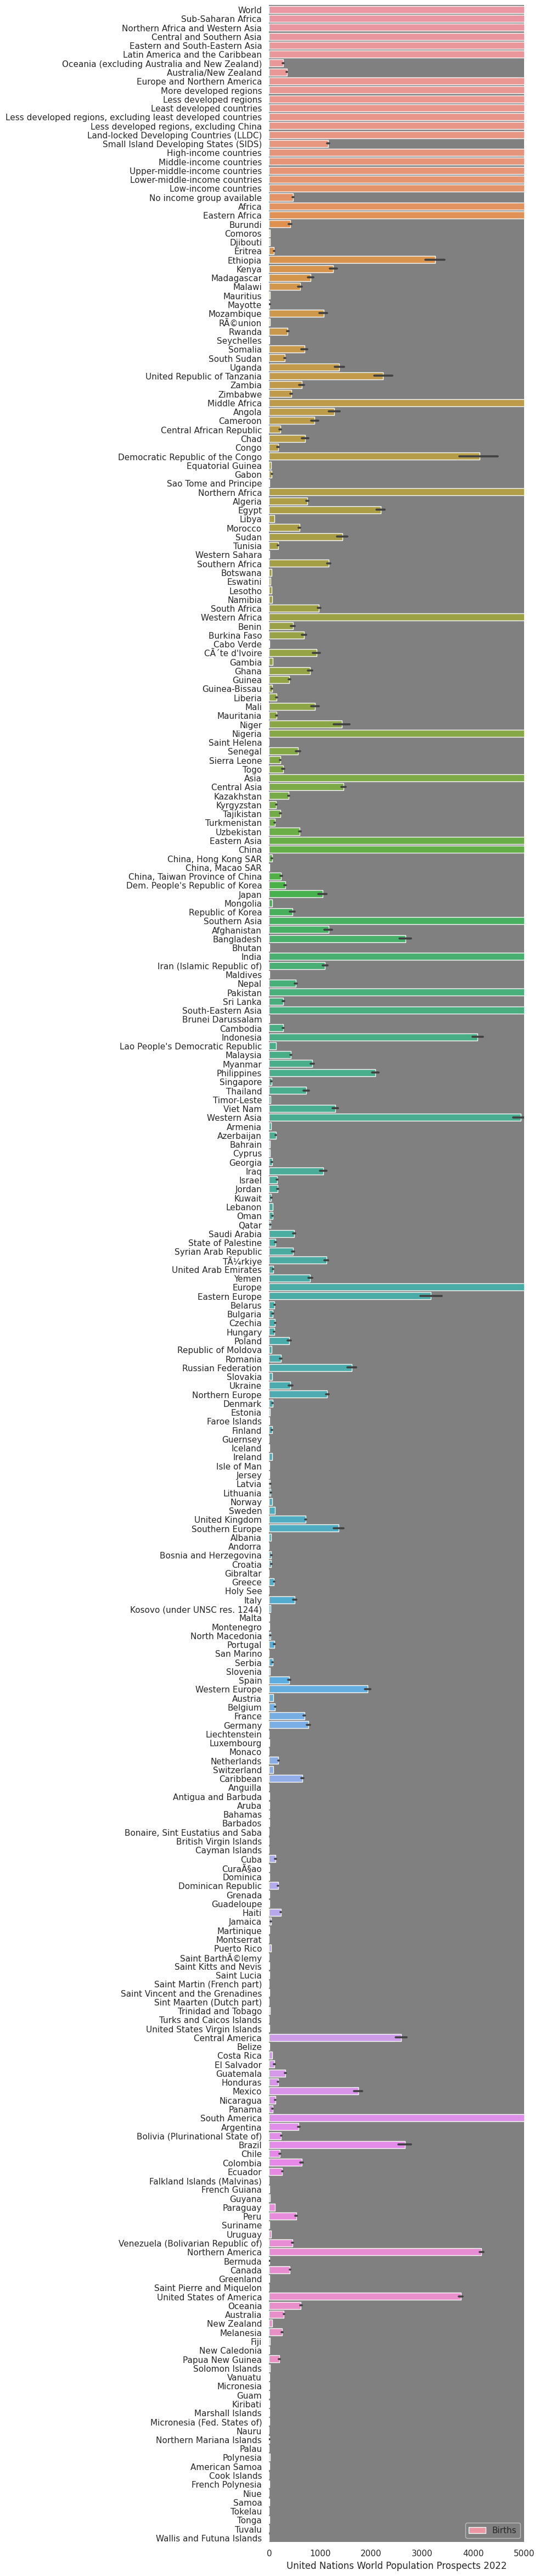

In [49]:
sns.set_theme(style="dark", palette=custom_palette6)
sns.set_style({"axes.facecolor": ".5"})
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 60))

# Load data and sort values
countries = file["Location"].sort_values(ascending=False)

# Plot countries and birth rate
sns.set_color_codes("pastel")
sns.barplot(y="Location", x="Births", data=file,
            label="Births")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="United Nations World Population Prospects 2022")
sns.despine(left=True, bottom=True)